In [1]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv (r'./lab 9-3(1).txt', sep = '\t')
df



,Time,EMG,Unnamed: 2
0,11.762,0.006232,NaN
1,11.763,0.047494,NaN
2,11.764,0.032936,NaN
3,11.765,-0.005510,NaN
4,11.766,-0.034533,NaN
...,...,...,...
14088,25.850,0.000594,NaN
14089,25.851,0.002799,NaN
14090,25.852,0.009922,NaN
14091,25.853,0.014762,NaN


Text(0, 0.5, 'EMG (Volts)')

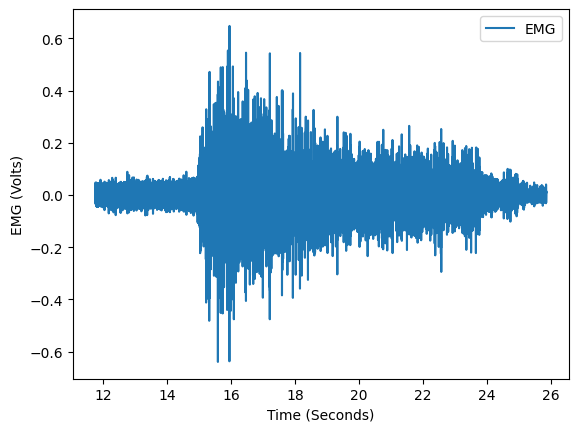

In [3]:
fig, ax = plt.subplots()
df.plot.line(ax = ax, y = 'EMG', x = 'Time')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (Volts)")

In [8]:
# Define the parameters
window_size = 3  # Window size in seconds (how large of a window you want to take the avg max of)
step_size = 3  # Step size in seconds (how often you want to check the window size)

In [9]:
# Initialize lists to store the calculated max values
max_values = []
time_intervals = []

# Iterate through the data in steps
for i in range(0, len(df), int(step_size / 0.001)):
    start_idx = i
    end_idx = start_idx + int(window_size / 0.001)

    if end_idx < len(df):
        window_data = df.iloc[start_idx:end_idx]
        max_value = window_data['EMG'].max()
        max_values.append(max_value)

        # Calculate the time interval (take the midpoint of the window)
        time_interval = window_data['Time'].mean()
        time_intervals.append(time_interval)

# Create a new DataFrame with the calculated max values and time intervals
result_df = pd.DataFrame({'Time': time_intervals, 'MaxEMG': max_values})

# Calculate the percentage of max EMG for each 0.5 seconds interval
result_df['MaxEMG_percent'] = (result_df['MaxEMG'] / result_df['MaxEMG'].max()) * 100

# Display the result
print(result_df)

      Time    MaxEMG  MaxEMG_percent
0  13.2615  0.089306       13.794689
1  16.2615  0.647397      100.000000
2  19.2615  0.543815       84.000235
3  22.2615  0.264757       40.895617


In [11]:
threshold =  60



In [12]:
reached_threshold = result_df[result_df['MaxEMG_percent'] <= threshold]
time_at_threshold = reached_threshold['Time'].iloc[0]
print(f"Time at ~{threshold} % of max: {time_at_threshold} seconds")

Time at ~60 % of max: 13.2615 seconds


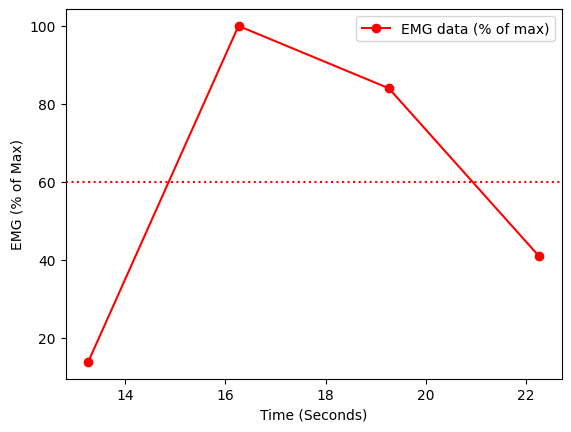

In [13]:
fig, ax = plt.subplots()
result_df.plot.line(ax = ax, y = 'MaxEMG_percent', x = 'Time', color = 'r', marker = 'o')
L=plt.legend()
L.get_texts()[0].set_text('EMG data (% of max)')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (% of Max)")
plt.axhline(threshold, color='red', ls='dotted')